'<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<svg\n   xmlns:svg="http://www.w3.org/2000/svg"\n   xmlns="http://www.w3.org/2000/svg"\n   width="800.0"\n   height="240.0"\n\n>\n    <g transform="scale(69.20188809083672, -69.20188809083672)   translate(3.857549370751361,-1.5895520055119063)" stroke-width="0.014450472777380966"  fill="none">\n       <!-- hidden lines -->\n       <g  stroke="rgb(160,160,160)" fill="none" stroke-dasharray="0.014450472777380966,0.014450472777380966" >\n\t\t\t<path d="M-0.02359645890915052,-0.6576855014574596 L0.967454815275168,-1.233378380717305 " />\n\t\t\t<path d="M-0.02359645890915052,-0.6576855014574596 L-0.02359645890915052,1.300542549964287 " />\n\t\t\t<path d="M-0.967454815275168,-0.7248496707044416 L-0.02359645890915052,-0.6576855014574596 " />\n\n       </g>\n\n       <!-- solid lines -->\n       <g  stroke="rgb(0,0,0)" fill="none">\n\t\t\t<path d="M-0.967454815275168,-0.7248496707044416 L0.02359645890915052,-1.300542549964287 " />\n\t\t\

In [100]:
import cadquery as cq


result = (
    cq.Workplane()
    .box(5, 5, 1)
    .faces(">Z")
    .sketch()
    .regularPolygon(2, 3, tag="outer")
    .regularPolygon(1.5, 3, mode="s")
    .vertices(tag="outer")
    .fillet(0.2)
    .finalize()
    .extrude(0.5)
)

display(result)


In [164]:
import math
import cadquery as cq

r_top = 0
r_bot = 0
th = 4
l = 12
strain = 0.04
nose_angle = math.radians(85)

bot_radius_sweep_angle = math.atan(l / (th / 2))
sin_th = math.sin(bot_radius_sweep_angle)
cos_th = math.cos(bot_radius_sweep_angle)

x_rad = (1 - cos_th) * r_bot  # The x-length of bot radius arc
y_rad = sin_th * r_bot  # The y-length of bot radius arc
arm_length = l - x_rad

nose_height = 1.09 * strain * arm_length ** 2 / th
nose_x = nose_height / math.tan(nose_angle)

# Point coordinates no radius business
p_c = [(0, 0), # Start
       (l * 1.20 + nose_x, 1 / 2 * th * 1.25),
       (l * 1.20 + nose_x, 3 / 4 * th),
       (l * 1.07 + nose_x, th + nose_height),
       (l + nose_x, th + nose_height),
       (l, th),
       (0, sin_th * r_bot + r_top + th)]

# Define which point indexes should be connected by straight lines
point_pair_indexes = [(2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7,-1)]
# Defines two arcs by point indexes and sweep angle
arc_lines = [(1, 0, - bot_radius_sweep_angle), (10, 11, math.pi/2)]

data = {"points_coordinates": p_c,
        "point_pair_indexes": point_pair_indexes,
        "arc_lines": arc_lines}

sketch = (
    cq.Workplane("XY")
)
import matplotlib.pyplot as plt
import numpy as np
data = np.array(p_c)
#data = np.unique(data, axis=0)
x = data[:,0]
y = data[:,1]
print(data)


sketch = sketch.moveTo(x[0], y[0])
for i in range(1, len(x)):
    x1, y1 = x[i], y[i]
    sketch = sketch.lineTo(x1, y1)

sketch = sketch.close()

assy = cq.Assembly()
assy.add(sketch, name="sketch", color=cq.Color("gray"))
#box = cq.Workplane().box(0.5, 0.5, 0.5)
display(assy)

for item in p_c:
    print(item)
print("#")
print(data)
x = data[:,0]
y = data[:,1]
lim = 100


[[ 0.          0.        ]
 [14.53732221  2.5       ]
 [14.53732221  3.        ]
 [12.97732221  5.5696    ]
 [12.13732221  5.5696    ]
 [12.          4.        ]
 [ 0.          4.        ]]


(0, 0)
(14.53732220627029, 2.5)
(14.53732220627029, 3.0)
(12.97732220627029, 5.5696)
(12.13732220627029, 5.5696)
(12, 4)
(0, 4.0)
#
[[ 0.          0.        ]
 [14.53732221  2.5       ]
 [14.53732221  3.        ]
 [12.97732221  5.5696    ]
 [12.13732221  5.5696    ]
 [12.          4.        ]
 [ 0.          4.        ]]


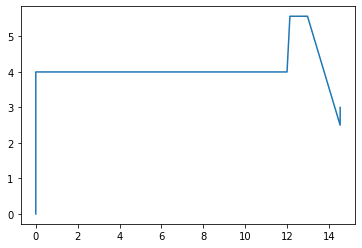

In [147]:
import matplotlib.pyplot as plt
import numpy as np
data = np.array(p_c)
data = np.unique(data, axis=0)


In [174]:
import math
import cadquery as cq
import matplotlib.pyplot as plt
import numpy as np
#export_path =  r"C:\Users\Alf\Programmering\CAD_Generator\stepfile.step"
export_path =  r"stepfile.step"
def snap_thingy():
    r_top = 0
    r_bot = 0
    th = 4
    l = 12
    strain = 0.04
    nose_angle = math.radians(85)
    arm_length = l - x_rad

    nose_height = 1.09 * strain * arm_length ** 2 / th
    nose_x = nose_height / math.tan(nose_angle)

    # Point coordinates no radius business
    p_c = [(0, 0), # Start
           (l * 1.20 + nose_x, 1 / 2 * th * 1.25),
           (l * 1.20 + nose_x, 3 / 4 * th),
           (l * 1.07 + nose_x, th + nose_height),
           (l + nose_x, th + nose_height),
           (l, th),
           (0, th)]

    sketch = (
        cq.Workplane("XY")
    )

    data = np.array(p_c)

    x = data[:,0]
    y = data[:,1]


    sketch = sketch.moveTo(x[0], y[0])
    for i in range(1, len(x)):
        x1, y1 = x[i], y[i]
        sketch = sketch.lineTo(x1, y1)

    sketch = sketch.close()
    sketch = sketch.extrude(1)
    
    assy = cq.Assembly()
    assy.add(sketch, name="sketch", color=cq.Color("gray"))
    cq.exporters.export(sketch, export_path)
    return assy
snap_thingy()
    

In [11]:
# The bracket
import cadquery as cq

thing = (
    cq.Workplane("XY")
    .lineTo(1,1)
    .close()
    #.extrude(1)
    # tag some faces for easy reference:
    #.faces(">Y[1]")
    #.tag("inner_vert")
    #.end()
    #.faces(">Z[1]")
    #.tag("inner_horiz")
    #.end()
)

assy = cq.Assembly()
assy.add(bracket, name="bracket", color=cq.Color("gray"))
#display(assy)
#display(result)

In [25]:
bracket = (
    cq.Workplane("YZ")
    .hLine(1)
    .vLine(0.1)
    .hLineTo(0.2)
    .vLineTo(1)
    .hLineTo(0)

)
bracket
#print(bracket.lineTo.__doc__)
#print(bracket.line.__doc__)


In [30]:
# Manual creatio of Square
bracket = (
    cq.Workplane("XY")
    .moveTo(0, 0)
    .lineTo(1, 0)
    .lineTo(1, 1)
    .lineTo(0, 1)
    .close()
)
            
            

#print(bracket.lineTo.__doc__)
#print(bracket.line.__doc__)
bracket
